<a href="https://colab.research.google.com/github/graviada/colabRepo/blob/master/HuaweiCourse_AI%20(2022)/Huawei_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HCIA-AI Linear regression lab**



## **Введение**

В данной работе мы рассмотрим основной алгоритм решения задачи регрессии, а также познакомимся с основными техниками работы с обучением и обучаемыми моделями на данных, которые пригодятся в дальнейшем практически для всех задач машинного и глубокого обучения.

In [ ]:
# Библиотека для продвинутой работы с многомерными массивами данных
import numpy as np

# Библиотека для простой визуализации данных
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 7.5    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True            # Сетка графика
plt.pink()                                  # Цветовая схема при раскраске

# Работа с таблицами данных
import pandas as pd

# Машинное обучение
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split                    # Деление датасета
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV     # Модели регрессии
from sklearn.metrics import r2_score, mean_absolute_error               # Метрики качества регрессии

<Figure size 720x540 with 0 Axes>


## **Суть метода линейной регрессии**

Метод линейной регрессии самый простой метод машинного обучения. Линейная регрессия решает задачу обучения с учителем -- **задачу регрессии**.

Задача регрессии заключается в востановлении непрерывной зависимости между предикторами $X = (x_1, x_2, \dots, x_m)$ (столбцы таблицы данных или переменные, выбранные в качестве зависимых переменных, $x_i,\ i$ - номер переменной) и откликом $Y$ (выбранным столбцом, который мы хотим предсказать).

Линейная модель метода линейной регрессии выглядит следующим образом: 

\begin{equation} 
    \hat{Y}(\omega, X) = \omega_0 + \sum_{i = 1}^{m} \omega_i \cdot x_i = \omega_0 \cdot 1 + \omega_1 \cdot x_1 + \omega_2 \cdot x_2 + \dots + \omega_m \cdot x_m
\end{equation}

Пусть у нас в распоряжении имеется таблица данных для решения задачи регресии:

\begin{equation}
data = \begin{vmatrix}  
            x_1 & x_2 & \dots & x_m & y \\ \hline
            x_{11} & x_{12} & \dots & x_{1m} & y_1 \\
            x_{21} & x_{22} & \dots & x_{2m} & y_2 \\ 
            \dots & \dots & \dots & \dots & \dots \\
            x_{n1} & x_{n2} & \dots & x_{nm} & y_n 
        \end{vmatrix}
\end{equation}
где данная таблица состоит из столбцов-предикторов $X$ и столбца-отклика $Y$:

\begin{equation}
X_{n\times m} = \begin{pmatrix}  
            x_1 & x_2 & \dots & x_m \\ \hline
            x_{11} & x_{12} & \dots & x_{1m}  \\
            x_{21} & x_{22} & \dots & x_{2m}  \\ 
            \dots & \dots & \dots & \dots  \\
            x_{n1} & x_{n2} & \dots & x_{nm} 
        \end{pmatrix}, \ \ 
Y_{n\times 1} = \begin{pmatrix}  
            y \\ \hline
            y_1 \\
            y_2 \\ 
            \dots \\
            y_n 
        \end{pmatrix}
\end{equation}

Тогда для каждой строки или наблюдения $j$ в таблице данных оцениваемое значение по построенной модели $\hat{Y_j}$ выглядит так:

\begin{equation}
    \hat{Y}(\omega, X_j) = \omega_o + \sum_{i = 1}^{m} \omega_i \cdot x_{ji}
\end{equation}

## **Пайплайн обучения моделей**

0. Загрузка данных
1. Исследование данных
2. Предобработка данных
3. Деление данных на тренировочную выборку и тестовую выборку
4. Выбор модели машинного обучения
5. Обучение с кросс-валидацией для обучения параметров модели и гиперпараметров архитектуры модели
6. Оценка качества моделей на отложенной тестовой выборке по выбранным метрикам качества
7. Выводы и сохранение лучшей модели

## **Загрузка данных**

Возьмем данные из датасета **Ames Housing** с помощью функции загрузки из **scikit_learn.datasets**

In [ ]:
df = datasets.fetch_openml(name="house_prices", as_frame=True)
dataframe = df['frame']

## **Исследование данных**

Просмотрим первые значения таблицы для того, чтобы удостовериться в правильности импорта столбцов и корректности определения их типов

In [ ]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [ ]:
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


Необходимо удостовериться в имеющихся типах данных и привести типы данных к одному из понятных в случае, если встретим тип **object**

In [ ]:
dataframe.dtypes

Id               float64
MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
                  ...   
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [ ]:
# Определим имена столбцов, тип данных которых object
objects_names = dataframe.axes[1][dataframe.dtypes == object]

# Приведем столбцы (переменные) на позициях к типу данных категорий
dataframe[objects_names] = dataframe[objects_names].astype('category')

dataframe.dtypes

Id                float64
MSSubClass        float64
MSZoning         category
LotFrontage       float64
LotArea           float64
                   ...   
MoSold            float64
YrSold            float64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

Попробуем осмотреть таблицу описательных статистик с целью:

1. Определить какие столбцы являются столбцами с числовыми данными
2. Просмотреть описательные статистики на наличие аномалий в столбцах

Находим пропуски значений в столбце **LotFrontage** и **MasVnrArea**. Необходимо также удостовериться в отсутствии пропусков в других столбцах более точными способами

Заполнять можно средним по столбцу, минимумом, максимумом, интерполяцией или регрессией по другому столбцу.

In [ ]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Нехитрым способом приведения результата к числовому массиву можно посмотреть чему равно количество пропущенных значений для каждого столбца таблицы данных по порядку

In [ ]:
dataframe.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
# Пропуски значений в столбцах таблицы данных
np.array(np.sum(dataframe.isna()))

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0])

In [ ]:
dataframe.isna().sum().head(6)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
dtype: int64

В первый раз для демонтрации возможностей модели регрессии мы воспользуемся только числовыми значениями столбцов, поэтому пока очищать пропущенные значения мы не будем


In [ ]:
# Имена числовых переменных
info_real_frame = dataframe.describe()
info_real_frame.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
data = dataframe[info_real_frame.columns[1:]]
print(data.corr())

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

In [ ]:
sales_correlations = data.corr().iloc[-1, :-1]
sales_correlations = sales_correlations.sort_values() 
print(sales_correlations)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64


In [ ]:
sales_predictors_labels = sales_correlations.axes[0]
print(sales_predictors_labels)

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
       'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF',
       'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea',
       'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual'],
      dtype='object')


In [ ]:
X = dataframe[sales_predictors_labels]
Y = dataframe[sales_correlations.name]
print(X.shape)
print(Y.shape)

(1460, 36)
(1460,)


In [ ]:
np.sum(X.isna())

KitchenAbvGr       0
EnclosedPorch      0
MSSubClass         0
OverallCond        0
YrSold             0
LowQualFinSF       0
MiscVal            0
BsmtHalfBath       0
BsmtFinSF2         0
3SsnPorch          0
MoSold             0
PoolArea           0
ScreenPorch        0
BedroomAbvGr       0
BsmtUnfSF          0
BsmtFullBath       0
LotArea            0
HalfBath           0
OpenPorchSF        0
2ndFlrSF           0
WoodDeckSF         0
LotFrontage      259
BsmtFinSF1         0
Fireplaces         0
MasVnrArea         8
GarageYrBlt       81
YearRemodAdd       0
YearBuilt          0
TotRmsAbvGrd       0
FullBath           0
1stFlrSF           0
TotalBsmtSF        0
GarageArea         0
GarageCars         0
GrLivArea          0
OverallQual        0
dtype: int64

Восстанавливаем значения с помощью интерполяции:

In [ ]:
X = X.interpolate(Axis = 1)

In [ ]:
np.sum(X.isna())

KitchenAbvGr     0
EnclosedPorch    0
MSSubClass       0
OverallCond      0
YrSold           0
LowQualFinSF     0
MiscVal          0
BsmtHalfBath     0
BsmtFinSF2       0
3SsnPorch        0
MoSold           0
PoolArea         0
ScreenPorch      0
BedroomAbvGr     0
BsmtUnfSF        0
BsmtFullBath     0
LotArea          0
HalfBath         0
OpenPorchSF      0
2ndFlrSF         0
WoodDeckSF       0
LotFrontage      0
BsmtFinSF1       0
Fireplaces       0
MasVnrArea       0
GarageYrBlt      0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
TotalBsmtSF      0
GarageArea       0
GarageCars       0
GrLivArea        0
OverallQual      0
dtype: int64

In [ ]:
seed=123
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 36)
Размер откликов для тренировки и кросс-валидации (1168,)


Можем просто обучить регрессор и посмотреть на результат на тесте, если нужно сделать беглую оценку результату отбора признаков

In [ ]:
model_lm = LinearRegression()           # Объект класса
model_lm.fit(X_train, Y_train)          # Метод обучение
print("Coefficients weights: ", model_lm.coef_, "\n")
print("R2 on train sample is", model_lm.score(X_train, Y_train))

Coefficients weights:  [-8.73285618e+03  5.70940547e+00 -1.96323360e+02  3.64741208e+03
 -5.72372529e+02 -1.46815334e+01 -4.93881350e-01  3.06849865e+03
  1.75897497e-01  1.53707889e+01  6.46233845e+01 -1.84848128e+01
  3.72633195e+01 -9.39149740e+03 -1.62919660e+00  8.64331512e+03
  4.16925511e-01 -3.03749920e+03  1.08038405e+00  2.07784833e+01
  2.45914971e+01 -1.13337910e+02  1.01560319e+01  5.28838119e+03
  2.75823062e+01  9.52209482e+01  1.60643937e+02  2.68948883e+02
  4.42180805e+03  2.72420629e+03  2.14815415e+01  8.70273283e+00
 -1.39965809e+01  1.43348577e+04  2.75784914e+01  1.75949819e+04] 

R2 on train sample is 0.8043029445018927


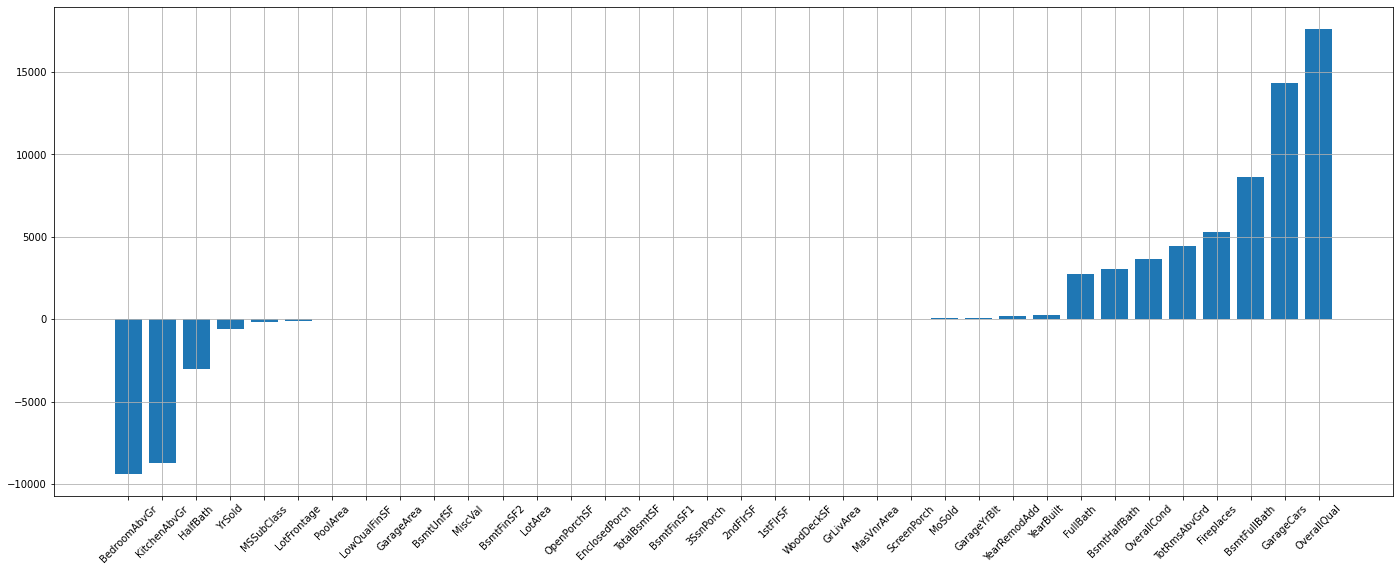

In [ ]:
plt.figure(figsize = (24, 9))
model_coeffs = pd.Series(data = model_lm.coef_, index=sales_predictors_labels)
plt.bar(x = model_coeffs.sort_values().axes[0], height = model_coeffs.sort_values())

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.show()

In [ ]:
preds = model_lm.predict(X_test)
R2_real = r2_score(Y_test, preds)
print(R2_real)

0.8421788031363042


In [ ]:
MAE_real = mean_absolute_error(Y_test, preds)
print(MAE_real)

19274.53672363394


In [ ]:
np.min(Y_test)

37900.0

In [ ]:
np.mean(Y_test)

181737.70205479453

In [ ]:
np.max(Y_test)

625000.0

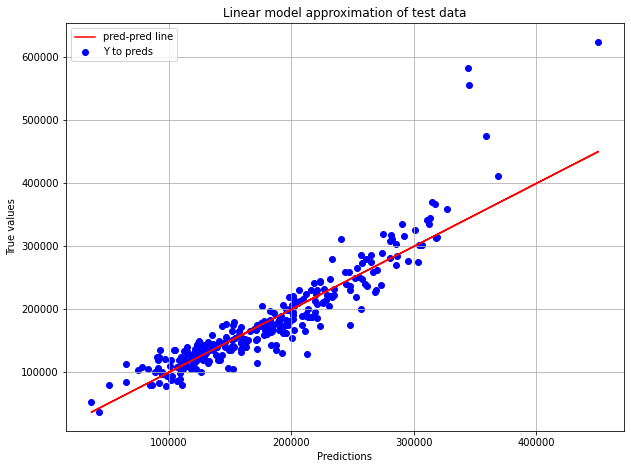

In [ ]:
plt.scatter(preds, Y_test, c = 'b', label = 'Y to preds')
plt.plot(preds, preds, c = 'r', label = 'pred-pred line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data")
plt.legend()
plt.show()

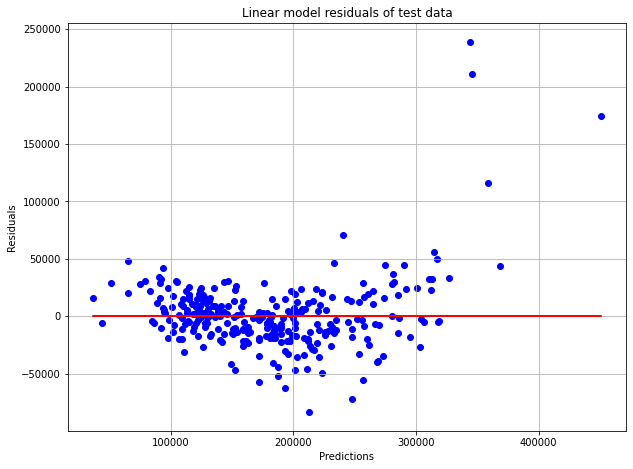

In [ ]:
plt.scatter(preds, Y_test - preds, c = 'b')
plt.plot(preds, np.zeros_like(preds), c = 'r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Linear model residuals of test data")
plt.show()

In [ ]:
seed=123
test_ratio = 0.2

r2_history_train = []
r2_history_test = []
pred_names = []
preds_y = []
models = []
predictors = np.arange(1, len(sales_correlations) + 1)

X = dataframe[sales_predictors_labels]
Y = dataframe[sales_correlations.name]
X = X.interpolate(Axis = 1)


for predictor_name in sales_predictors_labels[::-1]:
    pred_names.append(predictor_name)
    X_trace = X[pred_names]

    X_train, X_test, Y_train, Y_test = train_test_split(X_trace, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)
    model_lm = LinearRegression()
    model_lm.fit(X_train, Y_train)
    
    preds = model_lm.predict(X_test)
    models.append(model_lm)
    
    preds_y.append(preds)
    r2_history_train.append(model_lm.score(X_train, Y_train))
    r2_history_test.append(model_lm.score(X_test, Y_test))

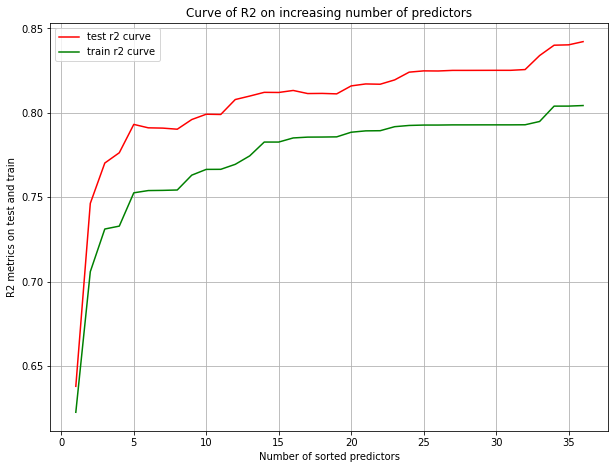

In [ ]:
plt.plot(predictors, r2_history_test, c = "r", label = 'test r2 curve')
plt.plot(predictors, r2_history_train, c = "g", label = 'train r2 curve')
plt.xlabel("Number of sorted predictors")
plt.ylabel("R2 metrics on test and train")
plt.title("Curve of R2 on increasing number of predictors")
plt.legend()

## **Регрессия с категориальными переменными**

In [ ]:
dummies_objects = pd.get_dummies(dataframe[objects_names], prefix=objects_names, )
dataframe_with_dummies = dataframe.join(dummies_objects)
dataframe_with_dummies.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,2.0,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,4.0,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5.0,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
predictor_lasso_colnames = dataframe_with_dummies.describe().axes[1]
# Хотелось бы без переприсваивания, но без него не работает
predictor_lasso_colnames = predictor_lasso_colnames.drop(['Id', 'SalePrice'])
print(predictor_lasso_colnames)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)


In [ ]:
# Выделение предикторов в отдельную таблицу
X = dataframe_with_dummies[predictor_lasso_colnames]
X = X.interpolate(Axis=1)
print(X.shape)

# Выделение откликов в отдельную таблицу
Y = dataframe_with_dummies['SalePrice']
print(Y.shape)

(1460, 288)
(1460,)


In [ ]:
seed=123
test_ratio = 0.2
cv_parts = 4

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 288)
Размер откликов для тренировки и кросс-валидации (1168,)


## **Модель Lasso**

In [ ]:
model_LASSO_cv = LassoCV(eps = 0.00001, n_alphas = 10000, cv = 4, random_state = seed)
model_LASSO_cv.fit(X_train, Y_train)

LassoCV(cv=4, eps=1e-05, n_alphas=10000, random_state=123)

In [ ]:
model_LASSO_cv.score(X_train, Y_train)

0.8030425171940252

In [ ]:
model_LASSO_cv.score(X_test, Y_test)

0.8465557696787853

In [ ]:
lasso_preds = model_LASSO_cv.predict(X_test)
MAE_lasso_dummies = mean_absolute_error(Y_test, lasso_preds)
MAE_lasso_dummies

18320.355897973168

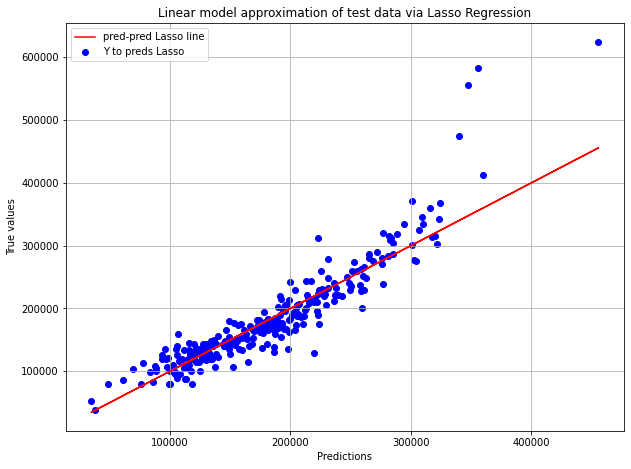

In [ ]:
plt.scatter(lasso_preds, Y_test, c = 'b', label = 'Y to preds Lasso')
plt.plot(lasso_preds, lasso_preds, c = 'r', label = 'pred-pred Lasso line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Lasso Regression")
plt.legend()
plt.show()

## **Модель Ridge**

In [ ]:
# cv - Cross-Validation
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 300), cv = 4)
model_RIDGE_cv.fit(X_train, Y_train)
model_RIDGE_cv.best_score_

0.7949904311249184

In [ ]:
model_RIDGE_cv.alpha_

10.357859531772576

In [ ]:
model_RIDGE_cv.score(X_train, Y_train)

0.8990436629162929

In [ ]:
model_RIDGE_cv.score(X_test, Y_test)

0.8910532612433733

In [ ]:
ridge_preds = model_RIDGE_cv.predict(X_test)
MAE_ridge_dummies = mean_absolute_error(Y_test, ridge_preds)
MAE_ridge_dummies

16274.122422841276

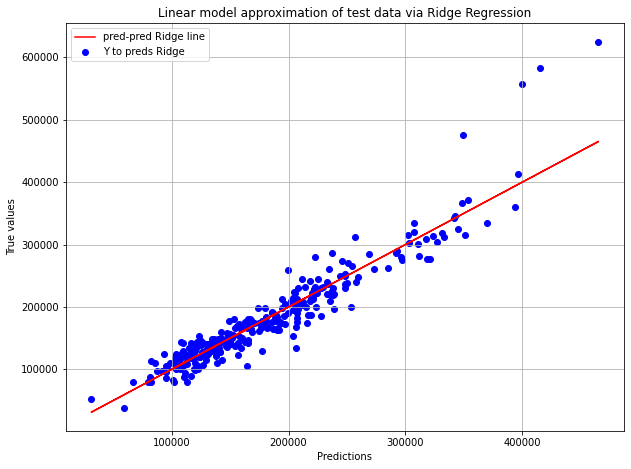

In [ ]:
plt.scatter(ridge_preds, Y_test, c = 'b', label = 'Y to preds Ridge')
plt.plot(ridge_preds, ridge_preds, c = 'r', label = 'pred-pred Ridge line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Ridge Regression")
plt.legend()
plt.show()

In [ ]:
# Коэффициенты модели
# model_RIDGE_cv.coef_

In [ ]:
# Стартовая цена дома, при всех предикторах == 0
model_RIDGE_cv.intercept_

466827.57630462287

## **Итог**

In [ ]:
print("Средняя абсолютная ошибка по линейной модели с числовыми предикторами", MAE_real)
print("Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами", MAE_lasso_dummies)
print("Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами", MAE_ridge_dummies)

Средняя абсолютная ошибка по линейной модели с числовыми предикторами 19274.53672363394
Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами 18320.355897973168
Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами 16274.122422841276




---



---



# **Домашнее задание**

## **Задание:**
Нужна медианная стоимость квартиры в доме.
Можно использовать ElasticNet, Rigde, Lasso, обычную регрессию.

### **Требование:**
Тест более 0.62

In [461]:
pip install shap

In [432]:
import numpy as np

import matplotlib.pyplot as plt
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 11, 7
plt.rcParams['axes.grid'] = True
plt.pink()

import shap
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler

from numpy import percentile

import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, SCORERS

<Figure size 792x504 with 0 Axes>

In [433]:
data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
data_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

data_train = pd.concat([data_train, data_test], axis=0)

print(data_train.shape, data_test.shape)

(20000, 9) (3000, 9)


### **Датасет:**

        - longitude               Показатель того, насколько далеко в сторону запада находится дом; более высокое значение - дальше на запад
        - latitude                Показатель того, насколько далеко в сторону севера находится дом; более высокое значение - дальше на север
        - housing_median_age      Средний возраст дома в пределах квартала; меньшее число означает более новое здание
        - total_rooms             Общее количество комнат в квартале
        - total_bedrooms          Общее количество спален в квартале
        - population              Общее количество людей, проживающих в пределах квартала
        - house_holds             Общее число семей - группа людей, проживающих в пределах жилого блока
        - median_income           Средний доход на семью в пределах квартала домов (измеряется в десятках тысяч долларов США)
        - median_house_value      Средняя стоимость дома для семей в пределах квартала (измеряется в долларах США)

### **Подготовка данных**

In [434]:
data_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


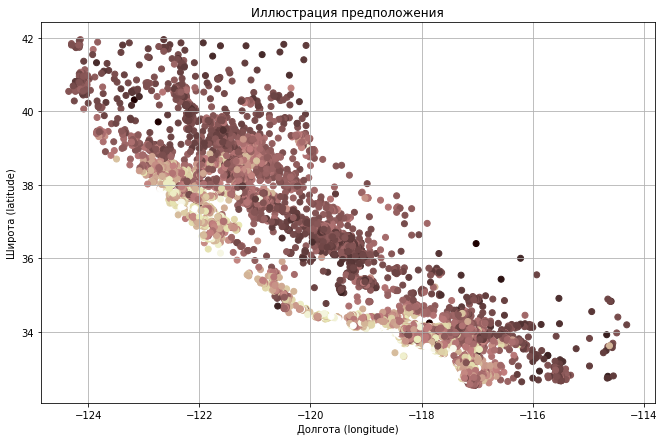

In [435]:
# Посмотрим предположение о том, что долгота и ширина связаны с медианной ценой дома
plt.scatter(x=data_train['longitude'], y=data_train['latitude'], c=data_train['median_house_value'])
plt.title("Иллюстрация предположения")
plt.xlabel("Долгота (longitude)")
plt.ylabel("Широта (latitude)")
plt.show()

Каких-то явно полезных зависимостей обнаружено не было. Смотрим дальше.

In [436]:
# Смотрим наличие корреляции в атрибутах с целевым столбцом. Нас интересует модуль корреляции.
# Но при этом линейно-зависимые признаки нам не сильно мешают в регрессии (мешают в классификации)
abs(data_train.corr().iloc[-1, :-1])

longitude             0.045788
latitude              0.143969
housing_median_age    0.104470
total_rooms           0.135298
total_bedrooms        0.051111
population            0.024234
households            0.066573
median_income         0.689109
Name: median_house_value, dtype: float64

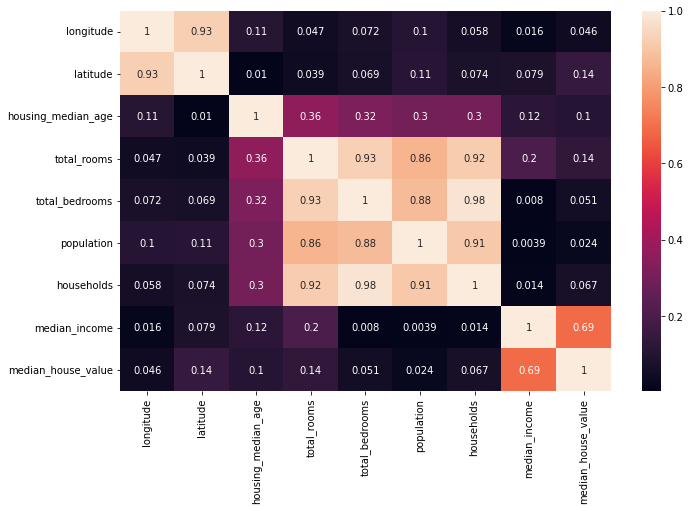

In [437]:
# Корреляция всех представленных атрибутов друг с другом.
heatmap(abs(data_train.corr()), annot=True)

Из неочевидного - коррелляция между средним доходом (median_income) 
и средней стоимостью дома (median_house_value) - 0.69.
Вероятно, застройщики ориентируются на проживающий там контингент.

In [438]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [439]:
# Смотрим основные статистики
data_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


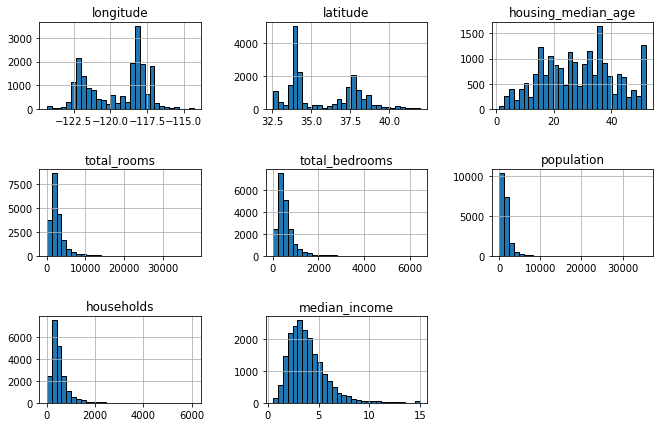

In [440]:
# Распределение других данных
data_train.iloc[:, :-1].hist(bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Как видно из графиков, распределения значений на некоторых подграфиках сдвинуты влево. Избавимся от этого с помщью логарифмирования

In [441]:
for i in ['total_rooms', 'total_bedrooms', 'population', 'households']:
  # Можно еще добавить 'median_income', но от его смещения результаты моделей становятся хуже. Почему?
  data_train[i] = np.log(data_train[i]+1)

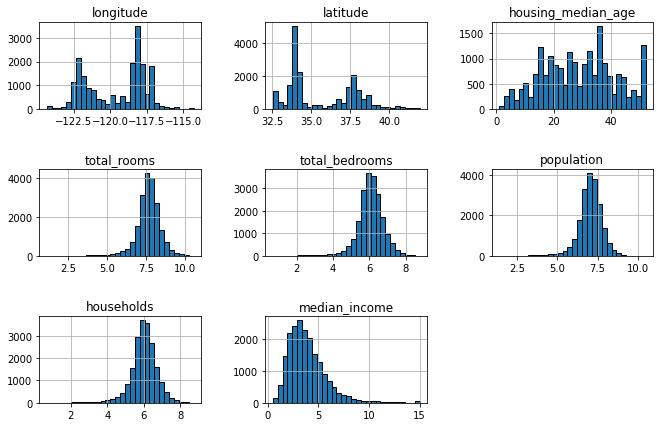

In [442]:
data_train.iloc[:, :-1].hist(bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### **Гипотеза:**


    - Стоимость дома тем выше, чем больше средний доход семьи по кварталу.



In [443]:
# Произведем масштабирование признаков для улучшения качества обучения нашей модели
# (используемая функция вычитает среднее значение и делит его на дисперсию)

scaler = StandardScaler()
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)

In [444]:
X = data_train_scaled[:, :-1]
Y = data_train_scaled[:, -1]
print(X.shape)
print(Y.shape)

(20000, 8)
(20000,)


In [445]:
# Тестовая выборка
# data_test_scaled = scaler.transform(data_test)

# X_rtest_sc = data_test_scaled[:, :-1]
# Y_rtest_sc = data_test_scaled[:, -1]

Теперь посмотрим на распределение самой целевой переменной - median_house_value

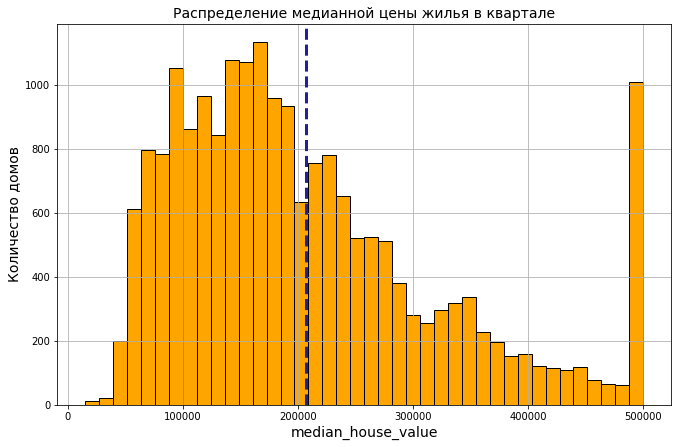

In [446]:
plt.hist(data_train.median_house_value, bins = 40, ec='black', color = 'orange')
plt.xlabel('median_house_value', fontsize=14)
plt.ylabel('Количество домов', fontsize=14)
plt.title('Распределение медианной цены жилья в квартале', fontsize=14)
plt.axvline(data_train['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3)
plt.show()

Обнаружен выброс в виде экстремально большого количества домов стоимостью около 5000000 долларов.

Это показывает наличие в Калифорнии большого количества строений класса люкс или же данная цена является значением по умолчанию.

От найденно выброса можно избавиться путем применения метода стандартных отклонений (для гауссоподобного распределения) или квартильным методом. Выберем второй.

In [447]:
q25, q75 = percentile(Y, 25), percentile(Y, 75)
iqr = q75 - q25
print('Квартили: 25-ый=%.3f, 75-ый=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Найденные границы: нижняя=%.3f, верхняя=%.3f' % (lower, upper))

Квартили: 25-ый=-0.755, 75-ый=0.501, IQR=1.257
Найденные границы: нижняя=-2.640, верхняя=2.386


In [448]:
indexes = []
Y_IQR = []
for i in range(len(Y)):
  if Y[i] >= lower and Y[i] <= upper:
    Y_IQR.append(Y[i])
  else:
    indexes.append(i)

Y_IQR = np.array(Y_IQR)
X_IQR = np.delete(X, indexes, axis=0)

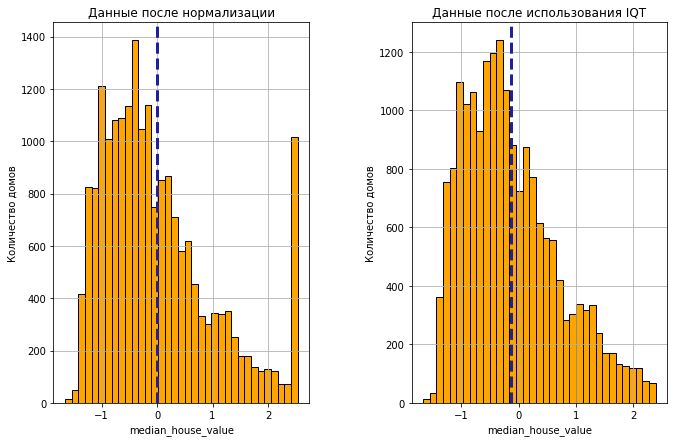

In [449]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(Y, bins=35, ec='black', color = 'orange')
plt.title("Данные после нормализации")
plt.xlabel('median_house_value')
plt.ylabel('Количество домов')
plt.axvline(Y.mean(), color='#21209c', linestyle='dashed', linewidth=3)

plt.subplot(1, 2, 2) # index 2
plt.hist(Y_IQR, bins=35, ec='black', color = 'orange')
plt.title("Данные после использования IQT")
plt.xlabel('median_house_value')
plt.ylabel('Количество домов')
plt.axvline(Y_IQR.mean(), color='#21209c', linestyle='dashed', linewidth=3)

plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

### **Работа с моделями**

In [450]:
# Тренировочный и тестовый наборы
seed = 12

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=seed,
                                                    shuffle=True)

### **Обычная линейная регрессия**

In [451]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

prediction_1 = linear_reg.predict(X_test)
MAE_1 = mean_absolute_error(Y_test, prediction_1)

print("Веса коэффициентов: ", linear_reg.coef_, "\n")
print("R2 на тестовом наборе: %0.5f" % linear_reg.score(X_test, Y_test))
print("MAE на тестовом наборе: %0.5f" % MAE_1)

Веса коэффициентов:  [-0.7245514  -0.77609083  0.11777215 -0.37691671  0.67701127 -0.59460004
  0.32099873  0.71873736] 

R2 на тестовом наборе: 0.66062
MAE на тестовом наборе: 0.42385


In [452]:
# prediction_1 = linear_reg.predict(X_rtest_sc)
# R2_1 = linear_reg.score(X_rtest_sc, Y_rtest_sc)
# MAE_1 = mean_absolute_error(Y_rtest_sc, prediction_1)

# print("R2 на тестовом наборе (первоначальный): %0.5f" % R2_1)
# print("MAE на тестовом наборе (первоначальный): %0.5f" % MAE_1)

# predict = linear_regr.predict(data_test_scaled[:, :-1])
# print(r2_score(data_test_scaled[:, -1], predict))

### **Промежуточные замечания:**

    1. Не было обнаружено разницы между результатами отмасштабированной регрессии и без масштабирования. Почему так?
    2. Был удален выброс из целевой переменной, а так же удалены строки из обучающего набора X с неиспользуемыми в новом Y
    индексами. Однако удаление выброса ухудшило результаты модели. Почему?

### **Линейная регрессия с применением кросс-валидации**

In [453]:
k = 3
cv_linear_reg = cross_validate(linear_reg, X, Y,
                       cv = k,
                       scoring = ('r2', 'neg_mean_absolute_error'))

sorted(cv_linear_reg.keys())
print(cv_linear_reg['test_r2'])
print(cv_linear_reg['test_neg_mean_absolute_error'])

print("Среднее значение R2 для линейной регрессии с применением кросс-валидации при", k, ": %0.5f" % cv_linear_reg['test_r2'].mean())
print("Среднее значение MAE для линейной регрессии с применением кросс-валидации при", k, ": %0.5f" % -cv_linear_reg['test_neg_mean_absolute_error'].mean())

[0.59542959 0.65913435 0.66776997]
[-0.39666953 -0.44818747 -0.44927942]
Среднее значение R2 для линейной регрессии с применением кросс-валидации при 3 : 0.64078
Среднее значение MAE для линейной регрессии с применением кросс-валидации при 3 : 0.43138


In [454]:
# sorted(SCORERS.keys())

### **Ridge-регрессия**

In [455]:
ridge_reg = Ridge(1e-4)
ridge_reg.fit(X_train, Y_train)

prediction_2 = ridge_reg.predict(X_test)
R2_2 = ridge_reg.score(X_test, Y_test)
MAE_2 = mean_absolute_error(Y_test, prediction_2)

print("Веса коэффициентов: ", ridge_reg.coef_, "\n")
print("R2 на тестовом наборе: %0.5f" % R2_2)
print("MAE на тестовом наборе: %0.5f" % MAE_2)

Веса коэффициентов:  [-0.72455133 -0.77609077  0.11777215 -0.37691659  0.6770111  -0.59460001
  0.32099876  0.71873734] 

R2 на тестовом наборе: 0.66062
MAE на тестовом наборе: 0.42385


In [456]:
ridge_reg_cv = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 0.1], cv=4, scoring='r2').fit(X_train, Y_train)

prediction_3 = ridge_reg_cv.predict(X_test)
R2_3 = ridge_reg_cv.score(X_test, Y_test)
MAE_3 = mean_absolute_error(Y_test, prediction_3)

print("R2 на тестовом наборе: %0.5f" % R2_3)
print("MAE на тестовом наборе: %0.5f" % MAE_3)

R2 на тестовом наборе: 0.66062
MAE на тестовом наборе: 0.42385


### **LASSO-регрессия**

In [457]:
lasso_reg = Lasso(1e-4)

lasso_reg.fit(X_train, Y_train)

prediction_4 = lasso_reg.predict(X_test)
R2_4 = lasso_reg.score(X_test, Y_test)
MAE_4 = mean_absolute_error(Y_test, prediction_4)

print("R2 на тестовом наборе: %0.5f" % R2_4)
print("MAE на тестовом наборе: %0.5f" % MAE_4)

R2 на тестовом наборе: 0.66062
MAE на тестовом наборе: 0.42386


In [458]:
lasso_reg_cv = LassoCV(alphas=[1e-4, 1e-3, 1e-2, 0.1], cv=4).fit(X_train, Y_train)

prediction_5 = lasso_reg_cv.predict(X_test)
R2_5 = lasso_reg_cv.score(X_test, Y_test)
MAE_5 = mean_absolute_error(Y_test, prediction_5)

print("R2 на тестовом наборе: %0.5f" % R2_5)
print("MAE на тестовом наборе: %0.5f" % MAE_5)

R2 на тестовом наборе: 0.66062
MAE на тестовом наборе: 0.42386


### **ElasticNet**

In [459]:
elastic_net = ElasticNet(alpha=0.4, l1_ratio=0.11)
elastic_net.fit(X_train, Y_train)

prediction_6 = elastic_net.predict(X_test)
R2_6 = elastic_net.score(X_test, Y_test)
MAE_6 = mean_absolute_error(Y_test, prediction_6)

print("R2 на тестовом наборе: %0.5f" % R2_6)
print("MAE на тестовом наборе: %0.5f" % MAE_6)

R2 на тестовом наборе: 0.47258
MAE на тестовом наборе: 0.55677


In [460]:
elastic_net_cv = ElasticNetCV(l1_ratio=0.3, eps=1e-4)
elastic_net_cv.fit(X_train, Y_train)

prediction_7 = elastic_net_cv.predict(X_test)
R2_7 = elastic_net_cv.score(X_test, Y_test)
MAE_7 = mean_absolute_error(Y_test, prediction_7)

print("R2 на тестовом наборе: %0.5f" % R2_7)
print("MAE на тестовом наборе: %0.5f" % MAE_7)

R2 на тестовом наборе: 0.66063
MAE на тестовом наборе: 0.42387


Лучше других отработала Ridge-регрессия.

### **Заключение**

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


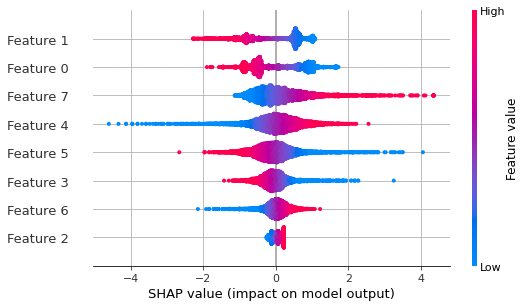

In [462]:
explainer = shap.LinearExplainer(ridge_reg, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

        - F0 - longitude               Показатель того, насколько далеко в сторону запада находится дом; более высокое значение - дальше на запад
        - F1 - latitude                Показатель того, насколько далеко в сторону севера находится дом; более высокое значение - дальше на север
        - F2 - housing_median_age      Средний возраст дома в пределах квартала; меньшее число означает более новое здание
        - F3 - total_rooms             Общее количество комнат в квартале
        - F4 - total_bedrooms          Общее количество спален в квартале
        - F5 - population              Общее количество людей, проживающих в пределах квартала
        - F6 - house_holds             Общее число семей - группа людей, проживающих в пределах жилого блока
        - F7 - median_income           Средний доход на семью в пределах квартала домов (измеряется в десятках тысяч долларов США)
        - F8 - median_house_value      Средняя стоимость дома для семей в пределах квартала (измеряется в долларах США)

**Выявленные закономерности:**
      
     1. Три наиболее важных признака: северное местоположение, западное местоположение, средний доход.
     2. Самые дешевые дома расположены на северо-западе Калифорнии.
     3. Чем выше средний доход населения, тем выше стоимость дома.
     4. Чем меньше людей в квартале, тем цена выше.

